## In the first part, you will make a system that predicts whether or not a tweet will go viral by using a K-Nearest Neighbor classifier. What features of a tweet do you think are the most important in determining its virality? Does the length of the tweet matter? What about the number of hashtags? Maybe information about the account that sent the tweet is most important. You’ll answer these questions while using DataFrames and Matplotlib visualizations to present your results!

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 100) # To see all columns from the dataframe

all_tweets = pd.read_json("random_tweets.json", lines=True)

#### New column 'is_viral' to classify viral tweets based on median values of 'retweet_count' column

In [3]:
median = all_tweets["retweet_count"].median()
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] > 100, 1, 0) # not using median value
# all_tweets['is_viral'].value_counts()

#### Features that we will use to detrmine if the tweet is viral

In [4]:
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)
# all_tweets['tweet_length']

In [5]:
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis=1)
# all_tweets['followers_count']

In [6]:
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis=1)

In [7]:
all_tweets['hashtag_counts'] = all_tweets.apply(lambda tweet: tweet['text'].count('#'), axis=1)
# print(all_tweets['hashtag_counts'].value_counts())

In [8]:
all_tweets['links_count'] = all_tweets.apply(lambda tweet: tweet['text'].count('http'), axis=1)
# print(all_tweets['links_count'])

In [9]:
# all_tweets['word_count'] = all_tweets.apply(lambda tweet: len(str(tweet).split()), axis=1)
# print(all_tweets['word_count'])

#### Create labels by of 'is_viral' columns

In [11]:
labels = all_tweets['is_viral']
data = all_tweets[['hashtag_counts', 'followers_count', 'friends_count', 'tweet_length', 'links_count']]
# print(data)

#### Normalise the data

In [12]:
scaled_data = scale(data, axis=0) # Normalizing the data
# print(scaled_data[0])

#### Split the data into training and test data set

In [13]:
train_data, test_data, train_labels,test_labels = train_test_split(data, labels, test_size=0.2, random_state=1)

### Find the best 'K' value for the K-Nearest Neighbour classifier

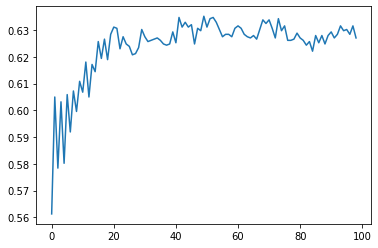

In [16]:
scores = []
for i in range(1, 100):
    k = 1
    score = 0
    classifier = KNeighborsClassifier(i)
    classifier.fit(train_data, train_labels)
    result = classifier.score(test_data, test_labels)
    scores.append(result)
    if result > score:
        score = result
        k = i

plt.plot(scores)
plt.show()

In [17]:
print(k)
classifier = KNeighborsClassifier(k)
classifier.fit(train_data, train_labels)
classifier.score(test_data, test_labels)

99


0.6270270270270271